# Data Exploration

In [1]:
%matplotlib inline

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import datetime

In [2]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select * from fires""", conn)

df_causes = pd.read_sql_query("""select distinct cause from fires""", conn)

df_years = pd.read_sql_query("""select distinct year from fires""", conn)

print(df_fires.isna().any())

conn.close()

df_fires.describe().transpose()

date                             False
lat                              False
long                             False
fod_id                           False
fpa_id                           False
SOURCE_SYSTEM_TYPE               False
SOURCE_SYSTEM                    False
NWCG_REPORTING_AGENCY            False
nwcg_reporting_unit_id           False
NWCG_REPORTING_UNIT_NAME         False
SOURCE_REPORTING_UNIT            False
SOURCE_REPORTING_UNIT_NAME       False
local_fire_report_id              True
local_incident_id                 True
fire_code                         True
fire_name                         True
ics_209_plus_incident_join_id     True
ICS_209_PLUS_COMPLEX_JOIN_ID      True
MTBS_ID                           True
MTBS_FIRE_NAME                    True
COMPLEX_NAME                      True
discovery_date                   False
DISCOVERY_DOY                    False
DISCOVERY_TIME                    True
NWCG_CAUSE_CLASSIFICATION        False
NWCG_GENERAL_CAUSE       

,count,mean,std,min,25%,50%,75%,max
lat,167232.0,3.725874e+01,2.521729e+00,32.500000,3.475000e+01,3.750000e+01,3.925000e+01,4.200000e+01
long,167232.0,-1.201662e+02,2.106493e+00,-124.500000,-1.217500e+02,-1.205000e+02,-1.185000e+02,-1.142500e+02
fod_id,167232.0,1.745825e+08,1.739246e+08,1.000000,1.307590e+06,2.011945e+08,4.000513e+08,4.004821e+08
local_fire_report_id,46489.0,6.051889e+04,1.551845e+05,1.000000,3.100000e+01,7.300000e+01,2.290000e+02,6.004890e+05
DISCOVERY_DOY,167232.0,1.974860e+02,6.935847e+01,1.000000,1.580000e+02,1.970000e+02,2.440000e+02,3.660000e+02
DISCOVERY_TIME,165400.0,1.398690e+03,5.089007e+02,0.000000,1.133000e+03,1.440000e+03,1.730000e+03,2.359000e+03
CONT_DOY,104824.0,2.008331e+02,6.635290e+01,1.000000,1.630000e+02,2.020000e+02,2.450000e+02,3.660000e+02
CONT_TIME,104256.0,1.456189e+03,5.152465e+02,0.000000,1.200000e+03,1.524000e+03,1.803000e+03,2.359000e+03
fire_size,167232.0,7.858610e+01,2.593605e+03,0.001000,1.000000e-01,2.000000e-01,1.000000e+00,4.102030e+05
latitude,167232.0,3.725765e+01,2.522234e+00,32.543500,3.469305e+01,3.742611e+01,3.915995e+01,4.203809e+01


  fire_size_class  count  smallest    largest
0               A  94194     0.001       0.25
1               B  62685     0.260       9.97
2               C   7089    10.000      99.00
3               D   1504   100.000     299.00
4               E    810   300.000     999.00
5               F    581  1000.000    4913.00
6               G    369  5000.000  410203.00


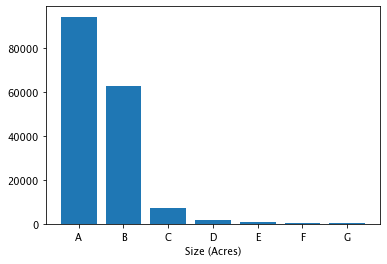

In [3]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fire_class = pd.read_sql_query("""
select fire_size_class, count(*) as count, min(fire_size) as smallest, max(fire_size) as largest
from fires
group by fire_size_class
order by fire_size_class
""", conn)

print(df_fire_class)
plt.bar('fire_size_class', 'count', data = df_fire_class)
plt.xlabel('Size (Acres)')

conn.close()

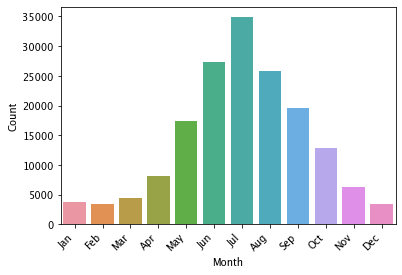

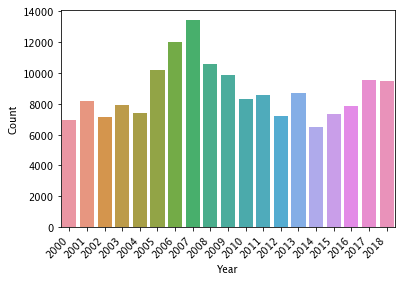

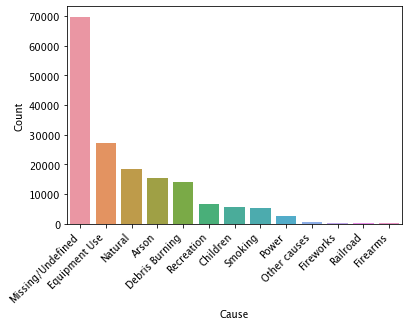

In [4]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""select longitude, latitude, year, month, cause from fires""", conn)

conn.close()

df_month_count = df_fires.groupby(['month']).size().reset_index(name = 'count').sort_values('count')
sns.barplot(data = df_month_count, y = 'count', x = 'month')
plt.xlabel('Month')
plt.xticks(
  range(12),
  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
  rotation=45,
  ha='right')
plt.ylabel('Count')
plt.show()

df_year_count = df_fires.groupby(['year']).size().reset_index(name = 'count').sort_values('count')
sns.barplot(data = df_year_count, y = 'count', x = 'year')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

causes_range = range(len(df_causes))
df_cause_count = df_fires.groupby(['cause']).size().reset_index(name = 'count').sort_values('count', ascending=False)
sns.barplot(data = df_cause_count, y = 'count', x = 'cause')
plt.xlabel('Cause')
plt.xticks(causes_range, rotation=45, ha='right')
plt.ylabel('Count')
plt.show()


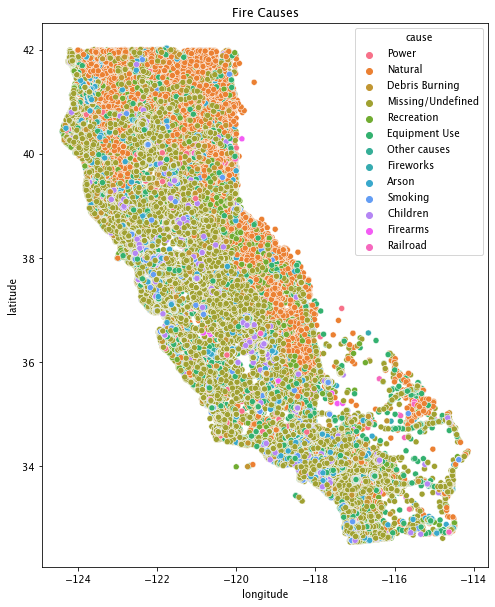

In [5]:
plt.figure(figsize=(8, 10))
plt.title('Fire Causes')
sns.scatterplot(x='longitude', y='latitude', data=df_fires, hue='cause')
plt.show()

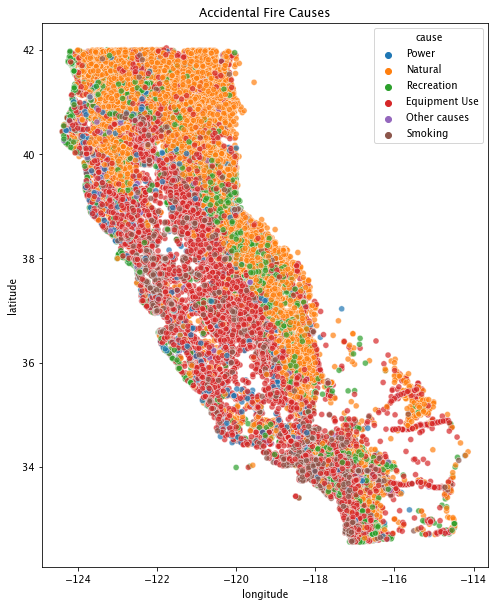

In [6]:
df_fires_natural = df_fires[
  df_fires.cause.isin(['Other causes', 'Natural', 'Power', 'Recreation', 'Equipment Use', 'Smoking'])]

plt.figure(figsize=(8, 10))
plt.title('Accidental Fire Causes')
sns.scatterplot(x='longitude', y='latitude', data=df_fires_natural, hue='cause', alpha=0.7)
plt.show()

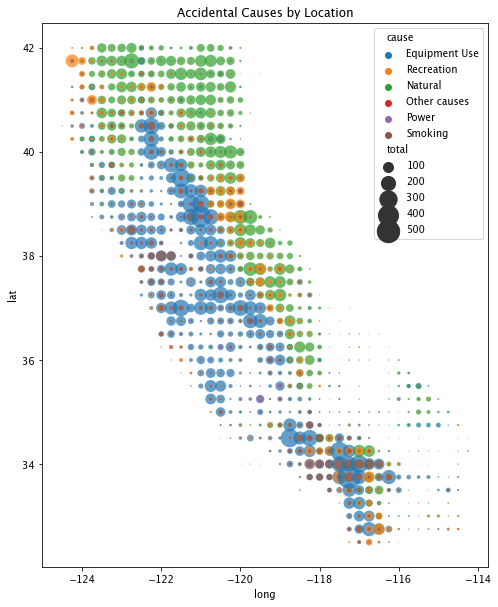

In [7]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_count_by_loc = pd.read_sql_query("""
  select long, lat, cause, count(1) as total
  from fires
  where cause in ('Other causes', 'Natural', 'Power', 'Recreation', 'Equipment Use', 'Smoking')
  group by long, lat, cause
""", conn)

conn.close()

minsize = min(df_count_by_loc.total)
maxsize = max(df_count_by_loc.total)

plt.figure(figsize=(8, 10))
plt.title('Accidental Causes by Location')
sns.scatterplot(x='long', y='lat', data=df_count_by_loc, hue='cause', alpha=0.7, size="total", sizes=(minsize, maxsize))
plt.show()

In [13]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_soil = pd.read_sql_query("""select * from soil""", conn)

print(df_soil.describe().transpose())

conn.close()

                         count         mean         std          min  \
long                      58.0  -120.754310    1.938468  -124.000000   
lat                       58.0    37.836207    2.164077    33.000000   
fips                      58.0  6058.000000   33.773757  6001.000000   
latitude                  58.0    37.838006    2.158956    33.023604   
longitude                 58.0  -120.749521    1.938832  -123.980998   
elevation                 58.0   621.551724  666.561487     0.000000   
slope_005                 58.0     0.042236    0.078355     0.000000   
slope_005_02              58.0     0.185560    0.266131     0.000000   
slope_02_05               58.0     0.115616    0.113343     0.000000   
slope_05_10               58.0     0.118331    0.103988     0.000000   
slope_10_15               58.0     0.099802    0.073397     0.000000   
slope_15_30               58.0     0.244883    0.184829     0.000000   
slope_30_45               58.0     0.111116    0.107039     0.00

In [16]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_weather_county = pd.read_sql_query("""select * from weather_county""", conn)

conn.close()

In [17]:
print(df_weather_county.describe().transpose())

                       count         mean        std      min      25%  \
month              4635920.0     6.522767   3.448748     1.00     4.00   
long               4635920.0  -119.622380   2.509245  -124.25  -121.50   
lat                4635920.0    37.251871   2.573235    32.75    35.00   
fips               4635920.0  6058.002994  29.761027  6001.00  6029.00   
precipitation      4635920.0     1.360085   5.017425     0.00     0.00   
pressure           4635920.0    91.813198   6.470744    71.19    87.73   
humidity_2m        4635920.0     5.251164   2.066662     0.55     3.72   
temp_2m            4635920.0    14.567090   9.115819   -19.26     8.05   
temp_dew_point_2m  4635920.0     2.079118   6.233807   -24.20    -2.12   
temp_wet_bulb_2m   4635920.0     8.323107   6.533989   -20.76     3.94   
temp_max_2m        4635920.0    21.920686  10.602367   -14.85    14.05   
temp_min_2m        4635920.0     8.341930   7.831247   -26.63     2.97   
temp_range_2m      4635920.0    13.578

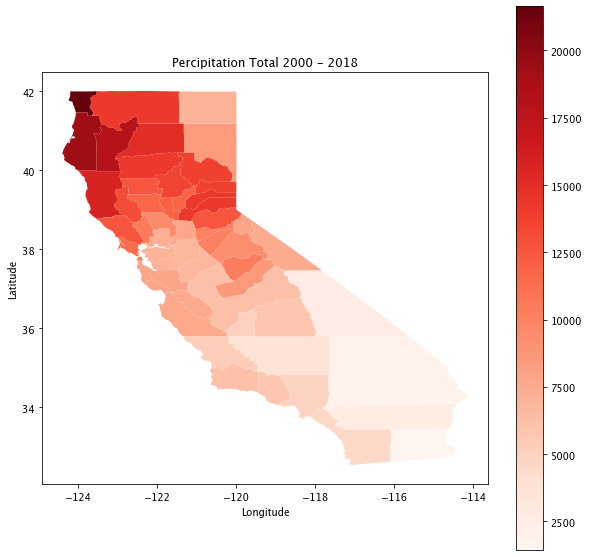

In [18]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_precip = pd.read_sql_query("""select precip.total, long, lat, geo_multipolygon
from (
  select sum(precipitation) as total, fips
  from weather_county
  group by fips
) as precip
inner join county on
  county.fips = precip.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_precip.geo_multipolygon)
gdf_precip = gpd.GeoDataFrame(df_precip, geometry=gs_county)

gdf_precip.plot(column='total', cmap='Reds', ax=ax)

bar_precip = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_precip.total.min(), vmax=df_precip.total.max()))
fig.colorbar(bar_precip)

plt.title(f'Percipitation Total {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

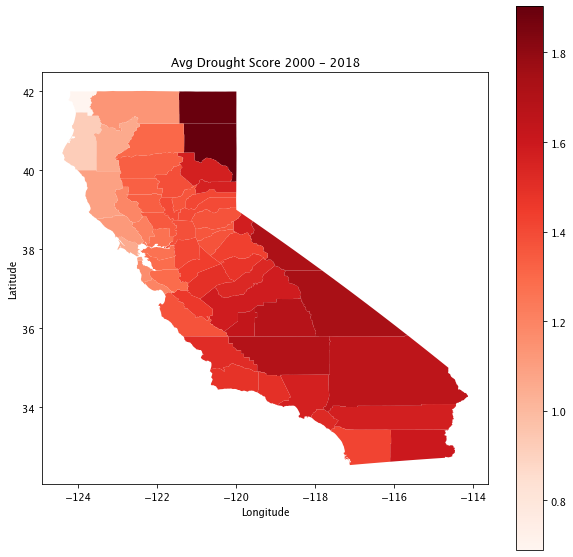

In [19]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_drought = pd.read_sql_query("""select drought.score, long, lat, geo_multipolygon
from (
  select avg(drought_score) as score, fips
  from weather_county
  group by fips
) as drought
inner join county on
  county.fips = drought.fips
""", conn)

conn.close()

fig, ax = plt.subplots(1, figsize=(10, 10))

gs_county = gpd.GeoSeries.from_wkt(df_drought.geo_multipolygon)
gdf_drought = gpd.GeoDataFrame(df_drought, geometry=gs_county)

gdf_drought.plot(column='score', cmap='Reds', ax=ax)

bar_drought = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_drought.score.min(), vmax=df_drought.score.max()))
fig.colorbar(bar_drought)

plt.title(f'Avg Drought Score {df_years.year.min()} - {df_years.year.max()}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

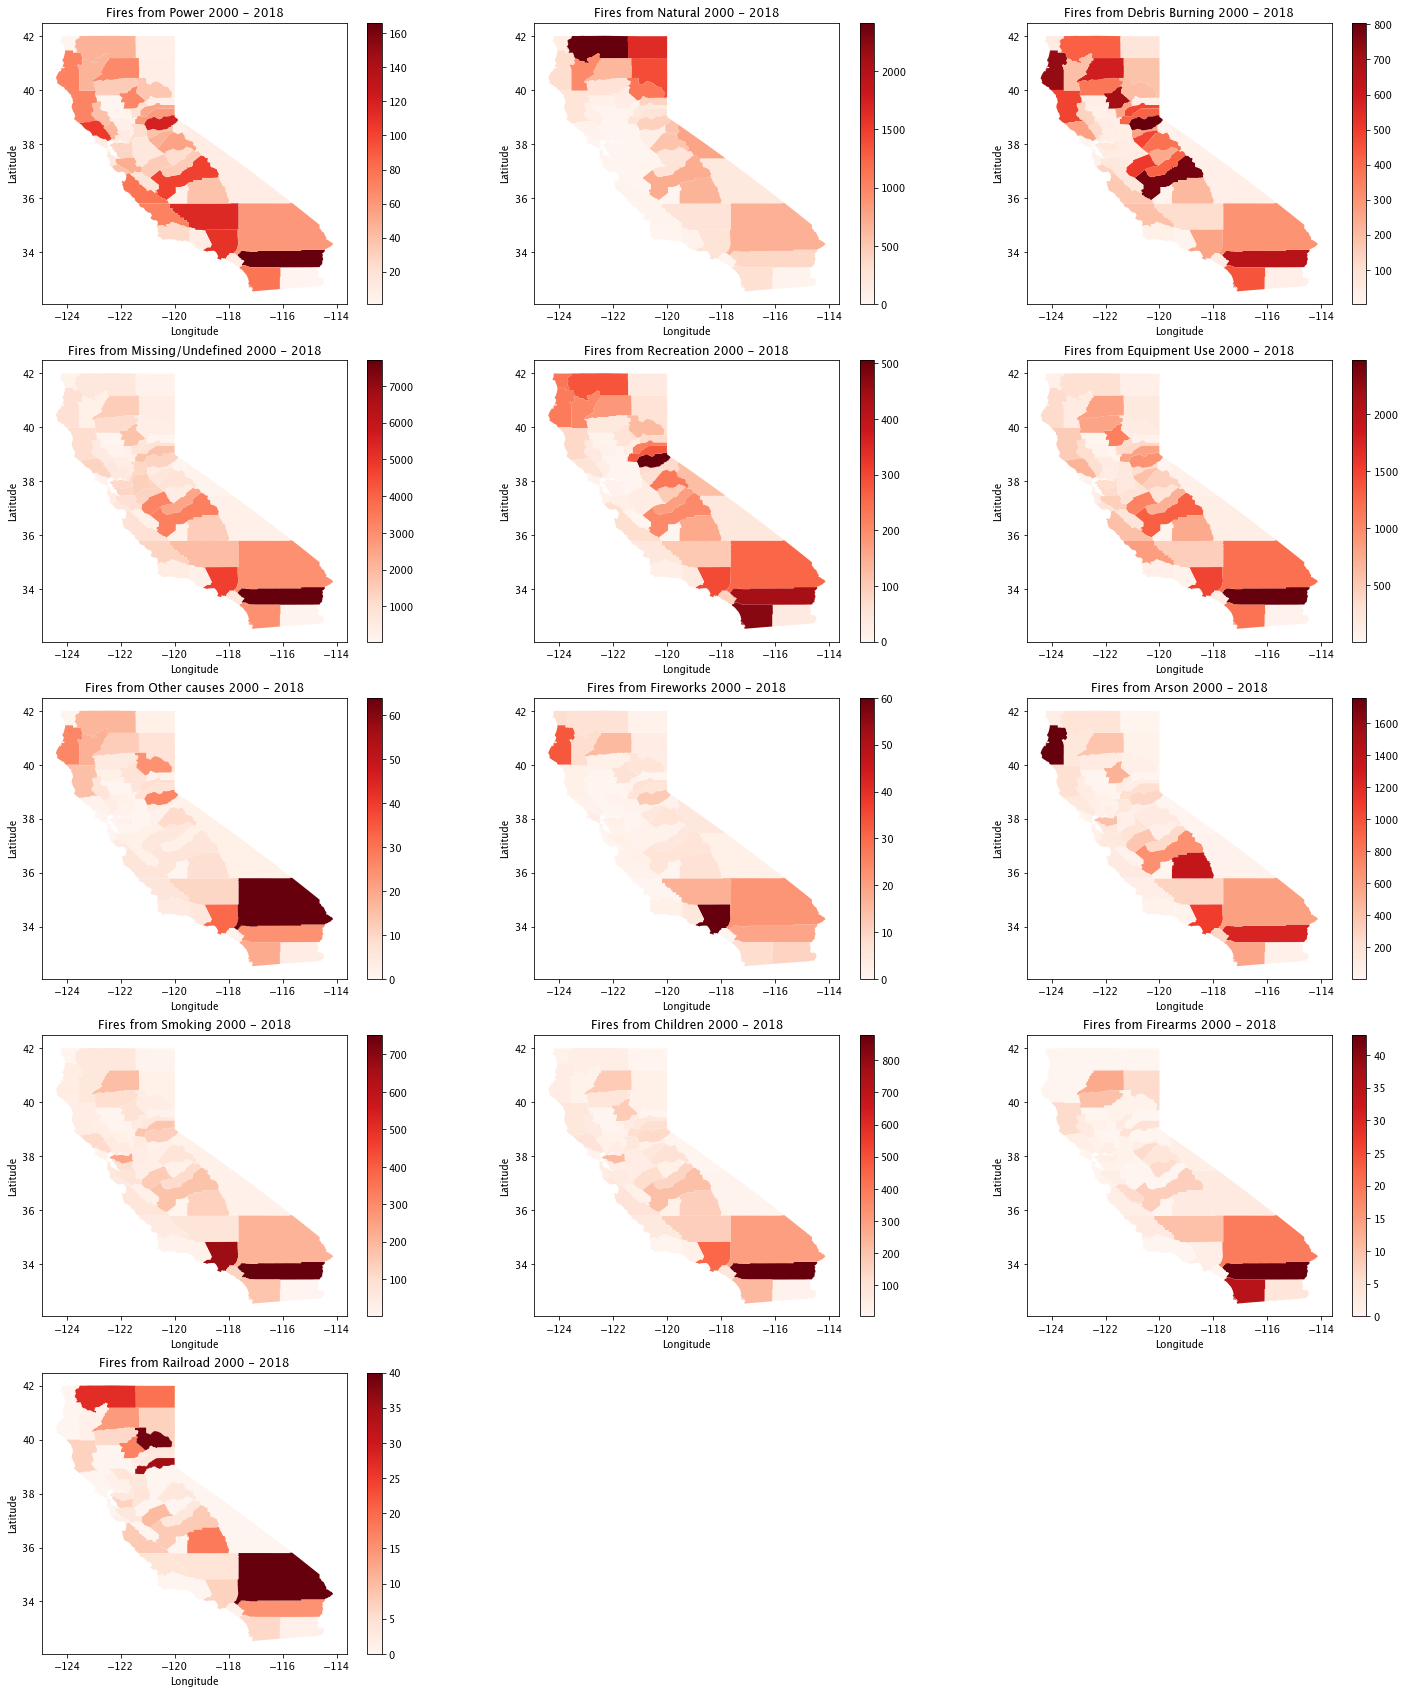

In [20]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires = pd.read_sql_query("""
select
  ifnull(fire_counts.total, 0) as total, causes.cause, long, lat, geo_multipolygon
from county
cross join (
  select distinct cause
  from fires
) as causes
left outer join (
  select count(*) as total, cause, fips
  from fires
  group by fips, cause
) as fire_counts on
  fire_counts.fips = county.fips
  and fire_counts.cause = causes.cause
""", conn)

conn.close()

gs_county = gpd.GeoSeries.from_wkt(df_fires.geo_multipolygon)
gdf_fires = gpd.GeoDataFrame(df_fires, geometry=gs_county)

fig = plt.figure(figsize=(25, 30))

i = 1
for cause in df_causes.cause:
  ax = plt.subplot(5, 3, i)

  gdf_cause = gdf_fires[gdf_fires.cause == cause]
  gdf_cause.plot(column='total', cmap='Reds', ax=ax)

  bar_fires = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=gdf_cause.total.min(), vmax=gdf_cause.total.max()) )
  fig.colorbar(bar_fires)

  plt.title(f'Fires from {cause} {df_years.year.min()} - {df_years.year.max()}')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')

  i += 1

In [22]:
conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_fires_prior = pd.read_sql_query("""
select
	fire_size_class,
	prior_fire_0_1_year,
	prior_fire_1_2_year,
	prior_fire_2_3_year,
	prior_fire_3_4_year,
	prior_fire_4_5_year,
	weather_geo.precipitation,
	weather_geo.temp_2m,
	soil.elevation,
	soil.aspect_north,
	soil.aspect_east,
	soil.aspect_south,
	soil.aspect_west
from fires
inner join weather_geo
	on weather_geo.date = fires.date
	and weather_geo.long = fires.long
	and weather_geo.lat = fires.lat
inner join soil
  on soil.fips = weather_geo.fips
""", conn)

df_fires_prior = pd.get_dummies(df_fires_prior, columns=['fire_size_class'])

conn.close()

<AxesSubplot:>

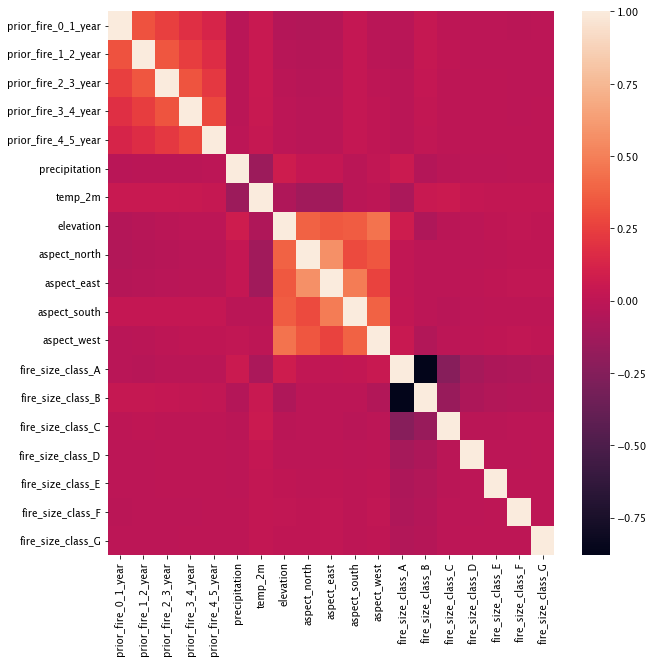

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_fires_prior.corr())

In [25]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/Users/eerichmo/Documents/fires.sqlite')
cur = conn.cursor()

df_temp_max = pd.read_sql_query("""
select month, lat, long, temp_max_2m as max_temp
from weather_geo
order by month
""", conn)

conn.close()

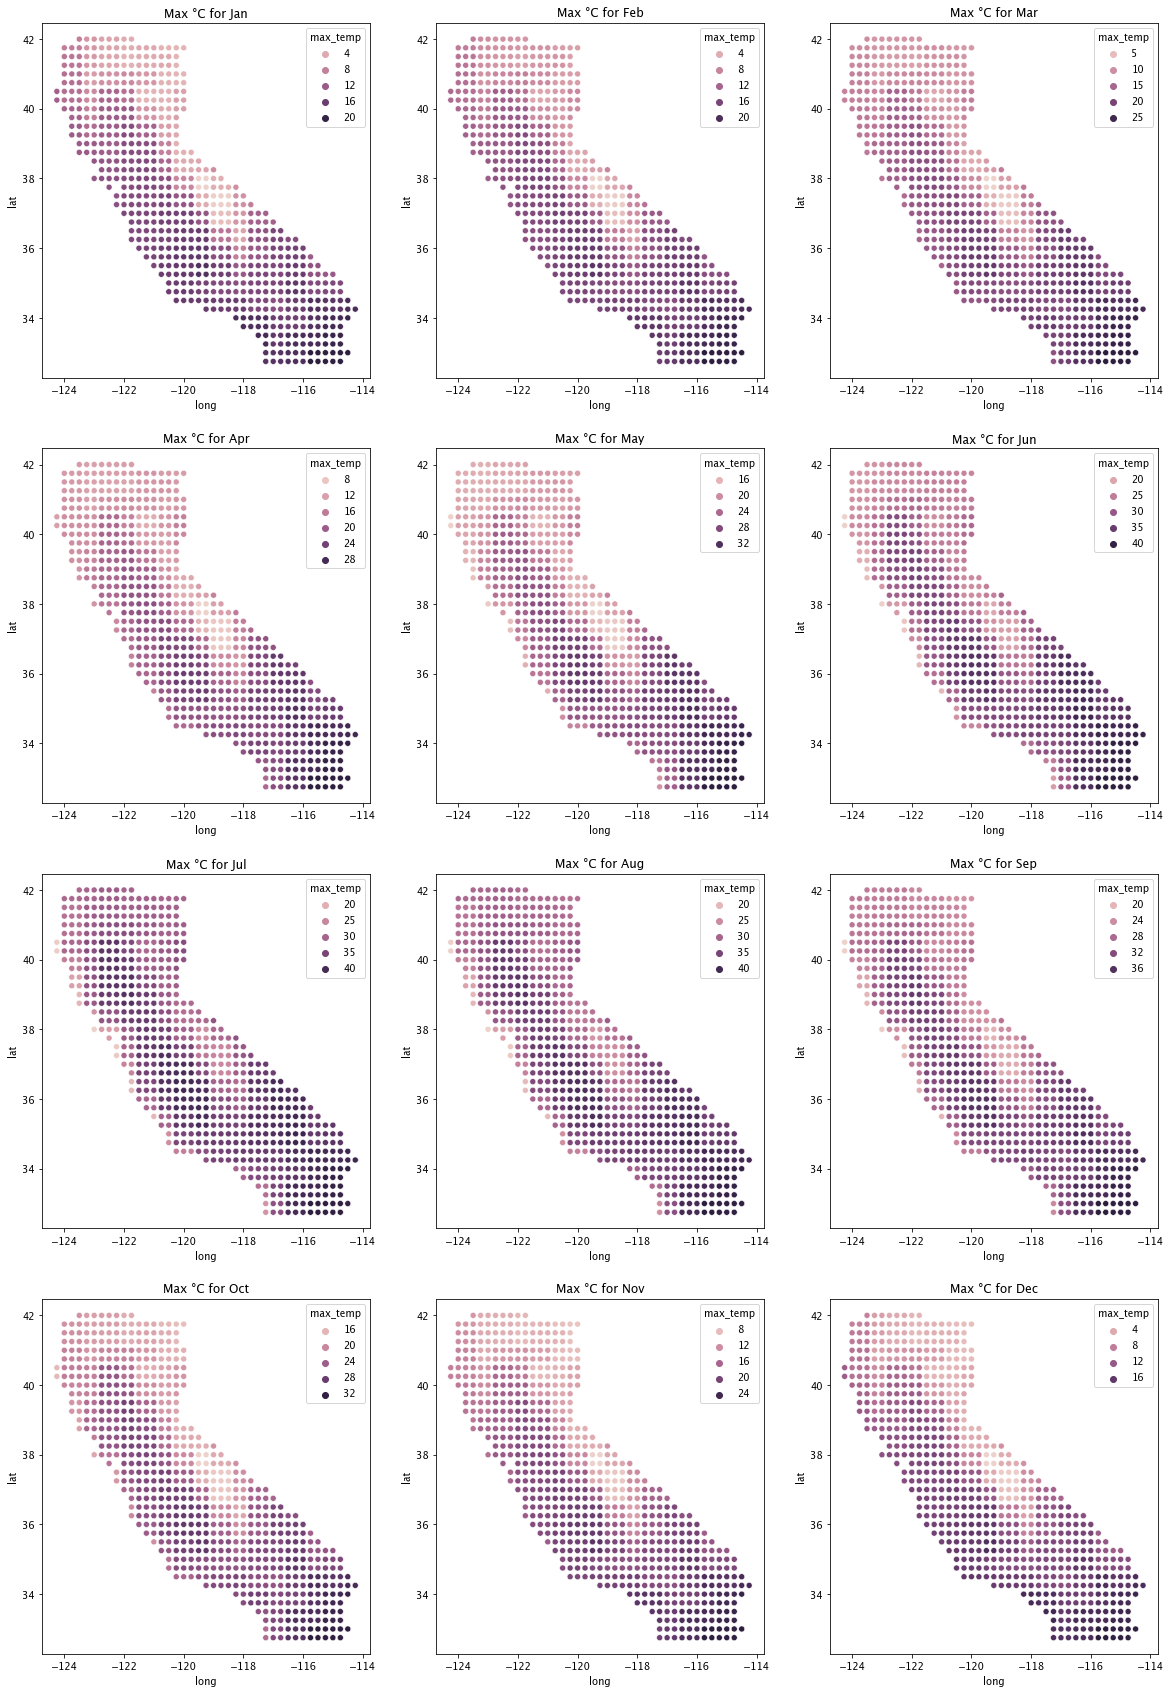

In [26]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_temp_avg = df_temp_max.groupby(['month', 'lat', 'long']).mean().reset_index().sort_values('month', ascending=False)

fig = plt.figure(figsize=(20, 30))

for i in range(1, 13):
  ax = plt.subplot(4, 3, i)
  mon = datetime.datetime.strptime(str(i), "%m").strftime("%b")

  plt.title(f'Max °C for {mon}')
  sns.scatterplot(x='long', y='lat', data=df_temp_avg[df_temp_avg.month == i], hue='max_temp')

### Test-Train-Split

#### Splitting for 2000-2015

- Train 2000-13 (13 years)
- Validation 2013-14 (1 year)
- Test 2014-15 (1 years)

#### How to Process 13 years of data?

- NN might allow batching
- Regression models for 0% - 100% per long/lat grid (55x55 km)
- Reduce long/lat grid (11x11 km)
- Visualize with heatmap
- Focus on origin long/lat

#### Models

1.  Linear
2.  Random Forest Regression
3.  ...any regression model